# Instituto Federal de Educação, Ciência e Tecnologia de Pernambuco
- Campus Paulista
- Discentes: Breno Henrique Montenegro de Freitas e Elton Luiz Alves
- Professor: Rodrigo Lira
- Disciplina: Tópicos especiais em Inteligência Artificial

# Algoritmo Genético para resolver problema de Knapsack 0/1 com 20 dimensões

In [60]:
import random
import copy
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_itens = 20
limite = 15
geracoes = 500
tamanho_populacao = 50
tamanho_torneio = 3
taxa_crossover = 0.8
taxa_mutacao = 0.02
elitismo = 2
num_de_execucoes = 30

pesos = [random.randint(1, 5) for _ in range(num_itens)]
valores = [random.randint(10, 100) for _ in range(num_itens)]


def gerar_populacao_inicial(tamanho_populacao, num_itens):
    populacao = []
    for _ in range(tamanho_populacao):
        individuo = [random.randint(0, 1) for _ in range(num_itens)]
        populacao.append(individuo)

    if len(populacao) != tamanho_populacao:
        print(f"ERRO INTERNO: População gerada tem tamanho {len(populacao)}, esperado {tamanho_populacao}", file=sys.stderr)
    return populacao


def calcular_fitness(individuo, pesos, valores, limite):
    peso_total = 0
    valor_total = 0

    for i in range(len(individuo)):
        if individuo[i] == 1:
            peso_total += pesos[i]
            valor_total += valores[i]

    if peso_total > limite:
        return 0
    return valor_total


def torneio(populacao, tamanho_torneio):
    try:
        candidatos = random.sample(populacao, tamanho_torneio)
    except ValueError as e:
        print(f"Erro no Torneio: População muito pequena. {e}", file=sys.stderr)
        return random.choice(populacao)

    melhor_candidato = candidatos[0]
    melhor_fitness = calcular_fitness(melhor_candidato, pesos, valores, limite)

    for i in range(1, len(candidatos)):
        candidato = candidatos[i]
        fitness = calcular_fitness(candidato, pesos, valores, limite)

        if fitness > melhor_fitness:
            melhor_fitness = fitness
            melhor_candidato = candidato
    return melhor_candidato


def crossover(pai1, pai2, tipo_crossover):
    n = len(pai1)

    if tipo_crossover == "um_ponto":
        ponto = random.randint(1, n - 1)
        filho1 = pai1[:ponto] + pai2[ponto:]
        filho2 = pai2[:ponto] + pai1[ponto:]
        return filho1, filho2

    elif tipo_crossover == "dois_pontos":
        ponto1 = random.randint(1, n - 2)
        ponto2 = random.randint(ponto1 + 1, n - 1)

        filho1 = pai1[:ponto1] + pai2[ponto1:ponto2] + pai1[ponto2:]
        filho2 = pai2[:ponto1] + pai1[ponto1:ponto2] + pai2[ponto2:]
        return filho1, filho2

    elif tipo_crossover == "uniforme":
        filho1 = []
        filho2 = []
        for i in range(n):
            if random.random() < 0.5:
                filho1.append(pai1[i])
                filho2.append(pai2[i])
            else:
                filho1.append(pai2[i])
                filho2.append(pai1[i])
        return filho1, filho2
    return pai1, pai2


def aplicar_mutacao(individuo, taxa_mutacao):
    for i in range(len(individuo)):
        if random.random() < taxa_mutacao:
            individuo[i] = 1 - individuo[i]
    return individuo


def AG_knapsack(tipo_crossover):
    populacao = gerar_populacao_inicial(tamanho_populacao, num_itens)

    if not populacao:
        print("Erro: A população inicial está vazia! Cheque 'gerar_populacao_inicial'.", file=sys.stderr)
        return {"individuo": None, "fitness": -1}

    melhor_global = {"individuo": None, "fitness": -1}
    historico_fitness = []

    for geracao in range(geracoes):
        avaliados = []

        for individuo in populacao:
            fitness = calcular_fitness(individuo, pesos, valores, limite)
            avaliados.append((fitness, individuo))

        if not avaliados:
            print(f"Erro Crítico na Geração {geracao + 1}: Lista 'avaliados' vazia.", file=sys.stderr)
            return melhor_global

        avaliados.sort(key=lambda x: x[0], reverse=True)

        melhores_individuos = [item[1] for item in avaliados]
        melhor_da_geracao = avaliados[0]


        if melhor_da_geracao[0] > melhor_global["fitness"]:
            melhor_global["fitness"] = melhor_da_geracao[0]
            melhor_global["individuo"] = copy.deepcopy(melhor_da_geracao[1])

            print(f"Geração {geracao + 1} ({tipo_crossover}): Novo melhor global encontrado! Fitness: {melhor_global['fitness']}")

        historico_fitness.append(melhor_global["fitness"])

        nova_populacao = [copy.deepcopy(ind) for ind in melhores_individuos[:elitismo]]

        while len(nova_populacao) < tamanho_populacao:
            pai_1 = torneio(melhores_individuos, tamanho_torneio)
            pai_2 = torneio(melhores_individuos, tamanho_torneio)

            filho_1 = copy.deepcopy(pai_1)
            filho_2 = copy.deepcopy(pai_2)

            if random.random() < taxa_crossover:
                filho_1, filho_2 = crossover(filho_1, filho_2, tipo_crossover)

            filho_1 = aplicar_mutacao(filho_1, taxa_mutacao)
            filho_2 = aplicar_mutacao(filho_2, taxa_mutacao)

            if len(nova_populacao) < tamanho_populacao:
                nova_populacao.append(filho_1)
            if len(nova_populacao) < tamanho_populacao:
                nova_populacao.append(filho_2)

        populacao = nova_populacao

    return {"individuo": melhor_global["individuo"],
            "fitness": melhor_global["fitness"],
            "convergencia": historico_fitness}


print(f"Capacidade da Mochila: {limite}")
print(f"Soma total dos pesos (Viabilidade): {sum(pesos)}")
print("-" * 50)

print("\n--- Iniciando AG com Crossover de Um Ponto ---")
resultado_um_ponto = AG_knapsack("um_ponto")
print(f"Melhor Fitness (Um Ponto): {resultado_um_ponto['fitness']}")

print("\n--- Iniciando AG com Crossover de Dois Pontos ---")
resultado_dois_pontos = AG_knapsack("dois_pontos")
print(f"Melhor Fitness (Dois Pontos): {resultado_dois_pontos['fitness']}")

print("\n--- Iniciando AG com Crossover Uniforme ---")
resultado_uniforme = AG_knapsack("uniforme")
print(f"Melhor Fitness (Uniforme): {resultado_uniforme['fitness']}")

print("\n--- Resultado Final ---")
print(f"Um Ponto: {resultado_um_ponto['fitness']}")
print(f"Dois Pontos: {resultado_dois_pontos['fitness']}")
print(f"Uniforme: {resultado_uniforme['fitness']}")

Capacidade da Mochila: 15
Soma total dos pesos (Viabilidade): 57
--------------------------------------------------

--- Iniciando AG com Crossover de Um Ponto ---
Geração 1 (um_ponto): Novo melhor global encontrado! Fitness: 0
Geração 2 (um_ponto): Novo melhor global encontrado! Fitness: 312
Geração 5 (um_ponto): Novo melhor global encontrado! Fitness: 381
Geração 6 (um_ponto): Novo melhor global encontrado! Fitness: 397
Geração 7 (um_ponto): Novo melhor global encontrado! Fitness: 422
Geração 9 (um_ponto): Novo melhor global encontrado! Fitness: 466
Geração 21 (um_ponto): Novo melhor global encontrado! Fitness: 467
Geração 22 (um_ponto): Novo melhor global encontrado! Fitness: 480
Geração 25 (um_ponto): Novo melhor global encontrado! Fitness: 513
Geração 30 (um_ponto): Novo melhor global encontrado! Fitness: 531
Geração 64 (um_ponto): Novo melhor global encontrado! Fitness: 540
Geração 311 (um_ponto): Novo melhor global encontrado! Fitness: 546
Melhor Fitness (Um Ponto): 546

--- Ini

# Atividade AG para Knapsack - Análises
- Executando 30 vezes para cada tipo de crossover e armazenando os resultados


In [61]:
def analise_crossover(num_de_execucoes, tipo_crossover):

    resultados_fitness = []
    matriz_convergencia = []
    print(f"Executando {num_de_execucoes} vezes com Crossover: {tipo_crossover}...")

    for i in range(num_de_execucoes):
        resultado = AG_knapsack(tipo_crossover)
        resultados_fitness.append(resultado['fitness'])
        matriz_convergencia.append(resultado['convergencia'])

        if (i + 1) % 5 == 0:
            print(f"  -> Execução {i + 1}/{num_de_execucoes} concluída.")

    return resultados_fitness, matriz_convergencia

tipos_de_crossover = ["um_ponto", "dois_pontos", "uniforme"]
todas_execucoes = {}
dados_convergencia = {}

print(f"Capacidade da Mochila: {limite}")
print(f"Soma total dos pesos (Viabilidade): {sum(pesos)}")
print("-" * 50)
print(f"INICIANDO ANÁLISE DE {num_de_execucoes} REPETIÇÕES\n")


for tipo in tipos_de_crossover:
    resultados_finais, matriz_convergencia = analise_crossover(num_de_execucoes, tipo)

    todas_execucoes[tipo] = resultados_finais

    media_convergencia = np.mean(np.array(matriz_convergencia), axis=0)
    dados_convergencia[tipo] = media_convergencia

Capacidade da Mochila: 15
Soma total dos pesos (Viabilidade): 57
--------------------------------------------------
INICIANDO ANÁLISE DE 30 REPETIÇÕES

Executando 30 vezes com Crossover: um_ponto...
Geração 1 (um_ponto): Novo melhor global encontrado! Fitness: 466
Geração 3 (um_ponto): Novo melhor global encontrado! Fitness: 520
Geração 5 (um_ponto): Novo melhor global encontrado! Fitness: 533
Geração 9 (um_ponto): Novo melhor global encontrado! Fitness: 535
Geração 18 (um_ponto): Novo melhor global encontrado! Fitness: 544
Geração 98 (um_ponto): Novo melhor global encontrado! Fitness: 546
Geração 1 (um_ponto): Novo melhor global encontrado! Fitness: 379
Geração 2 (um_ponto): Novo melhor global encontrado! Fitness: 389
Geração 4 (um_ponto): Novo melhor global encontrado! Fitness: 490
Geração 10 (um_ponto): Novo melhor global encontrado! Fitness: 529
Geração 14 (um_ponto): Novo melhor global encontrado! Fitness: 537
Geração 15 (um_ponto): Novo melhor global encontrado! Fitness: 541
Gera

# Resultado das Métricas e Gráfico de Convergência do AG Um Ponto, AG Dois Pontos e AG Uniforme

- Média
- Desvio Padrão
- Melhor Encontrado
- Pior Encontrado
- Gráfico de Convergência


RESULTADOS FINAIS DA ANÁLISE (30 REPETIÇÕES)

[UM_PONTO] - 30 Execuções:
  Melhores Fitness Finais: [546, 551, 544, 546, 551, 551, 551, 551, 546, 546, 544, 546, 551, 546, 544, 544, 544, 546, 546, 544, 551, 551, 546, 544, 544, 546, 551, 546, 544, 524]
----------------------------------------
  Média: 546.17
  Desvio Padrão: 4.98
  Melhor Encontrado: 551
  Pior Encontrado: 524

[DOIS_PONTOS] - 30 Execuções:
  Melhores Fitness Finais: [544, 544, 544, 551, 551, 551, 544, 544, 546, 542, 551, 544, 546, 544, 544, 544, 524, 544, 544, 544, 551, 544, 544, 544, 544, 544, 544, 546, 551, 544]
----------------------------------------
  Média: 544.87
  Desvio Padrão: 4.79
  Melhor Encontrado: 551
  Pior Encontrado: 524

[UNIFORME] - 30 Execuções:
  Melhores Fitness Finais: [551, 551, 551, 551, 542, 551, 546, 551, 546, 551, 544, 551, 542, 542, 544, 551, 544, 542, 551, 544, 551, 544, 544, 546, 544, 546, 544, 544, 551, 551]
----------------------------------------
  Média: 547.03
  Desvio Padrão: 3.62


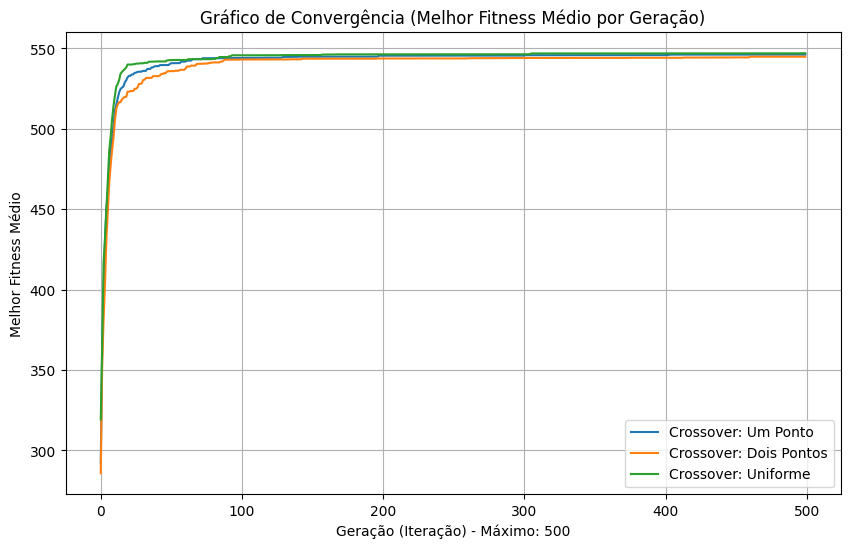

In [62]:
print("\n" + "=" * 50)
print("RESULTADOS FINAIS DA ANÁLISE (30 REPETIÇÕES)")
print("=" * 50)

for tipo, resultados in todas_execucoes.items():
    media = np.mean(resultados)
    desvio = np.std(resultados)

    print(f"\n[{tipo.upper()}] - {len(resultados)} Execuções:")
    print(f"  Melhores Fitness Finais: {resultados}")
    print("-" * 40)
    print(f"  Média: {media:.2f}")
    print(f"  Desvio Padrão: {desvio:.2f}")
    print(f"  Melhor Encontrado: {max(resultados)}")
    print(f"  Pior Encontrado: {min(resultados)}")

plt.figure(figsize=(10, 6))
for tipo, media_fitness in dados_convergencia.items():
    plt.plot(media_fitness, label=f'Crossover: {tipo.replace("_", " ").title()}')

plt.title('Gráfico de Convergência (Melhor Fitness Médio por Geração)')
plt.xlabel(f'Geração (Iteração) - Máximo: {geracoes}')
plt.ylabel('Melhor Fitness Médio')
plt.legend()
plt.grid(True)
plt.show()

# Comparação entre AG Um Ponto, AG Dois Pontos, AG Uniforme, Hill Climbing Tradicional e Hill Climbing Estocastico

In [68]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_itens = 20
limite = 15
max_iteracoes_hc = 500
num_de_execucoes = 30

random.seed(42)
pesos = [random.randint(1, 5) for _ in range(num_itens)]
valores = [random.randint(10, 100) for _ in range(num_itens)]
random.seed(None)

ag_um_ponto_results = [515, 536, 515, 536, 536, 515, 536, 536, 536, 515, 536, 536, 515, 536, 515, 536, 536, 515, 536, 515, 536, 536, 536, 536, 536, 515, 515, 515, 536, 536]
ag_dois_pontos_results = [536, 515, 515, 515, 536, 536, 536, 536, 536, 536, 536, 536, 515, 536, 536, 536, 515, 536, 536, 515, 536, 536, 536, 536, 515, 515, 515, 536, 536, 536]
ag_uniforme_results = [516, 536, 536, 536, 536, 515, 536, 536, 515, 536, 515, 536, 536, 536, 515, 536, 536, 536, 536, 515, 536, 536, 536, 536, 515, 515, 536, 536, 515, 515]

def calcular_fitness(individuo):
    peso_total = 0
    valor_total = 0
    for i in range(len(individuo)):
        if individuo[i] == 1:
            peso_total += pesos[i]
            valor_total += valores[i]

    if peso_total > limite:
        return 0
    return valor_total

def gerar_populacao_inicial_hc(num_itens):
    return [random.randint(0, 1) for _ in range(num_itens)]

def gerar_vizinhos_knapsack(solucao, n_vizinhos=10):
    vizinhos = []
    n_itens = len(solucao)
    posicoes_tentadas = set()
    while len(vizinhos) < n_vizinhos and len(posicoes_tentadas) < n_itens:
        pos = random.randint(0, n_itens - 1)
        if pos not in posicoes_tentadas:
            vizinho = solucao.copy()
            vizinho[pos] = 1 - vizinho[pos]
            vizinhos.append(vizinho)
            posicoes_tentadas.add(pos)
    return vizinhos

class HillClimbingTradicional:
    def __init__(self, funcao_fitness, gerar_vizinhos, maximizar=True):
        self.funcao_fitness = funcao_fitness
        self.gerar_vizinhos = gerar_vizinhos
        self.maximizar = maximizar

    def executar(self, solucao_inicial, max_iteracoes=1000):
        solucao_atual = solucao_inicial.copy()
        fitness_atual = self.funcao_fitness(solucao_atual)
        iteracao = 0

        while iteracao < max_iteracoes:
            iteracao += 1
            vizinhos = self.gerar_vizinhos(solucao_atual)
            melhor_vizinho = None
            melhor_fitness_vizinho = fitness_atual

            for vizinho in vizinhos:
                fitness_vizinho = self.funcao_fitness(vizinho)
                eh_melhor = (fitness_vizinho > melhor_fitness_vizinho if self.maximizar else fitness_vizinho < melhor_fitness_vizinho)

                if eh_melhor:
                    melhor_vizinho = vizinho
                    melhor_fitness_vizinho = fitness_vizinho

            if melhor_vizinho is not None and melhor_fitness_vizinho > fitness_atual:
                solucao_atual = copy.deepcopy(melhor_vizinho)
                fitness_atual = melhor_fitness_vizinho
            else:
                break
        return fitness_atual

class HillClimbingEstocastico:
    def __init__(self, funcao_fitness, gerar_vizinhos, maximizar=True):
        self.funcao_fitness = funcao_fitness
        self.gerar_vizinhos = gerar_vizinhos
        self.maximizar = maximizar

    def executar(self, solucao_inicial, max_iteracoes=1000):
        solucao_atual = solucao_inicial.copy()
        fitness_atual = self.funcao_fitness(solucao_atual)
        iteracao = 0

        while iteracao < max_iteracoes:
            iteracao += 1
            vizinhos = self.gerar_vizinhos(solucao_atual)
            vizinhos_melhores = []

            for vizinho in vizinhos:
                fitness_vizinho = self.funcao_fitness(vizinho)
                eh_melhor = (fitness_vizinho > fitness_atual if self.maximizar else fitness_vizinho < fitness_atual)

                if eh_melhor:
                    vizinhos_melhores.append((vizinho, fitness_vizinho))

            if vizinhos_melhores:
                vizinho, fitness_vizinho = random.choice(vizinhos_melhores)
                solucao_atual = copy.deepcopy(vizinho)
                fitness_atual = fitness_vizinho
            else:
                break
        return fitness_atual

def analise_hill_climbing(num_de_execucoes):
    hc_tradicional_results = []
    hc_estocastico_results = []

    algoritmos_hc = {
        "HC Tradicional": (HillClimbingTradicional(calcular_fitness, gerar_vizinhos_knapsack), hc_tradicional_results),
        "HC Estocástico": (HillClimbingEstocastico(calcular_fitness, gerar_vizinhos_knapsack), hc_estocastico_results)
    }

    for nome_algoritmo, (algoritmo, results_list) in algoritmos_hc.items():
        print("=" * 60)
        print(f"INICIANDO ANÁLISE DE {num_de_execucoes} REPETIÇÕES PARA: {nome_algoritmo.upper()}")
        print("=" * 60)

        for i in range(num_de_execucoes):
            solucao_inicial = gerar_populacao_inicial_hc(num_itens)
            fitness_final = algoritmo.executar(solucao_inicial, max_iteracoes_hc)
            results_list.append(fitness_final)

            if (i + 1) % 5 == 0:
                 print(f"  -> Execução {i + 1}/{num_de_execucoes} concluída. Fitness Final: {fitness_final}")

    return hc_tradicional_results, hc_estocastico_results


print(f"Capacidade da Mochila: {limite}")
print(f"Soma total dos pesos dos itens: {sum(pesos)}")
print("-" * 60)

hc_tradicional_results, hc_estocastico_results = analise_hill_climbing(num_de_execucoes)

todos_os_resultados = {
    'AG (Um Ponto)': ag_um_ponto_results,
    'AG (Dois Pontos)': ag_dois_pontos_results,
    'AG (Uniforme)': ag_uniforme_results,
    'HC Tradicional': hc_tradicional_results,
    'HC Estocástico': hc_estocastico_results
}

resultados_filtrados = {k: v for k, v in todos_os_resultados.items() if v}

print("\n" + "=" * 60)
print("RESUMO ESTATÍSTICO DOS ALGORITMOS (30 REPETIÇÕES)")
print("=" * 60)

if len(resultados_filtrados) > 1:
    df_resultados = pd.DataFrame(resultados_filtrados)
    print(df_resultados.describe())

Capacidade da Mochila: 15
Soma total dos pesos dos itens: 50
------------------------------------------------------------
INICIANDO ANÁLISE DE 30 REPETIÇÕES PARA: HC TRADICIONAL
  -> Execução 5/30 concluída. Fitness Final: 0
  -> Execução 10/30 concluída. Fitness Final: 656
  -> Execução 15/30 concluída. Fitness Final: 0
  -> Execução 20/30 concluída. Fitness Final: 0
  -> Execução 25/30 concluída. Fitness Final: 0
  -> Execução 30/30 concluída. Fitness Final: 226
INICIANDO ANÁLISE DE 30 REPETIÇÕES PARA: HC ESTOCÁSTICO
  -> Execução 5/30 concluída. Fitness Final: 515
  -> Execução 10/30 concluída. Fitness Final: 0
  -> Execução 15/30 concluída. Fitness Final: 348
  -> Execução 20/30 concluída. Fitness Final: 417
  -> Execução 25/30 concluída. Fitness Final: 0
  -> Execução 30/30 concluída. Fitness Final: 0

RESUMO ESTATÍSTICO DOS ALGORITMOS (30 REPETIÇÕES)
       AG (Um Ponto)  AG (Dois Pontos)  AG (Uniforme)  HC Tradicional  \
count      30.000000         30.000000      30.000000     

# Gráfico de Boxplot comparando AG Um Ponto, AG Dois Pontos, AG Uniforme, Hill Climbing Tradicional e Hill Climbing Estocastico

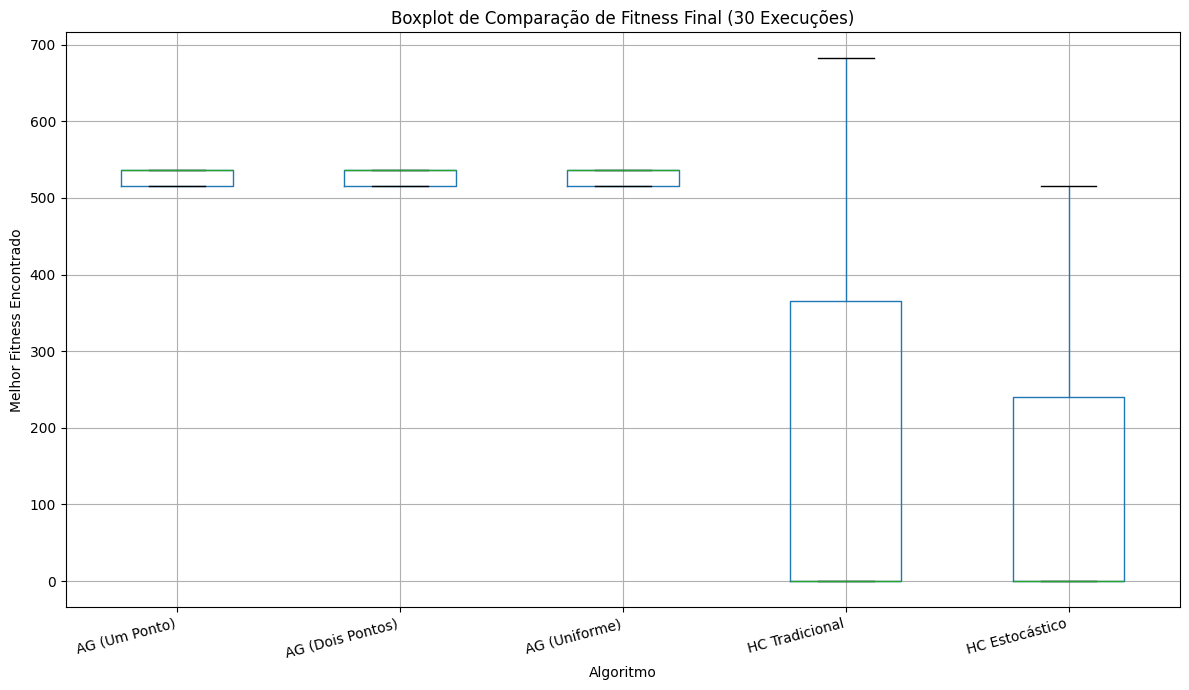

In [69]:
if len(resultados_filtrados) > 1:
    df_resultados = pd.DataFrame(resultados_filtrados)

    plt.figure(figsize=(12, 7))
    df_resultados.boxplot(grid=True)
    plt.title(f"Boxplot de Comparação de Fitness Final (30 Execuções)")
    plt.ylabel("Melhor Fitness Encontrado")
    plt.xlabel("Algoritmo")

    plt.gca().set_xticklabels(df_resultados.columns, rotation=15, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("Ainda faltam dados para a comparação.")